In [6]:
from proton_driver import client
import time
import plotly.graph_objs as go
from IPython.display import clear_output, display

c = client.Client(host='192.168.1.10', port=8463)

In [7]:
num = 1
time_sleep = 1

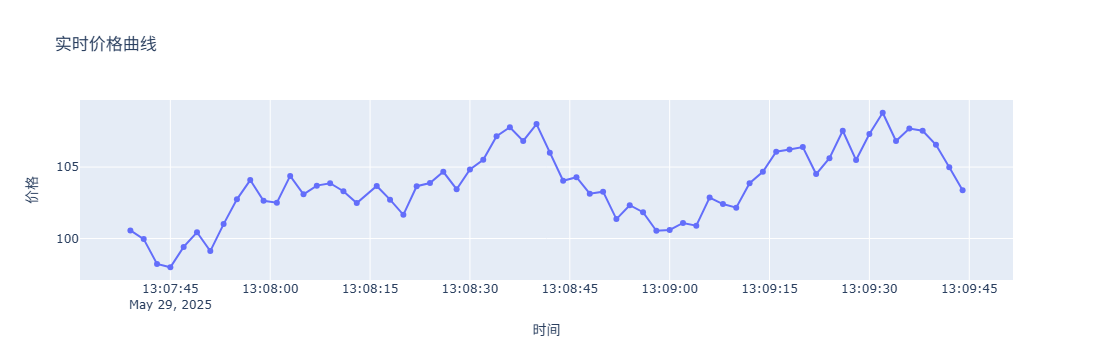

KeyboardInterrupt: 

In [8]:
def fetch_data():
    rows = c.execute_iter(
        f"SELECT TIMESTAMP, price FROM price_data ORDER BY TIMESTAMP ASC LIMIT {num}"
    )
    data = list(rows)
    timestamps = [row[0] for row in data]
    prices = [row[1] for row in data]
    return timestamps, prices

history_timestamps = []
history_prices = []

while True:
    timestamps, prices = fetch_data()
    # 只取最新一条
    latest_timestamp = timestamps[-1]
    latest_price = prices[-1]
    print(f"最新时间: {latest_timestamp}, 最新价格: {latest_price}")
    history_timestamps.append(latest_timestamp)
    history_prices.append(latest_price)
    clear_output(wait=True)
    fig = go.Figure(data=go.Scatter(x=history_timestamps, y=history_prices, mode='lines+markers'))
    fig.update_layout(title='实时价格曲线', xaxis_title='时间', yaxis_title='价格')
    display(fig)
    time.sleep(time_sleep)